<a href="https://colab.research.google.com/github/ILayZ/AIU/blob/master/Pulsars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


%matplotlib inline

from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
path = '/gdrive/My Drive/Colab Notebooks/data/'
%ls "$path"

Credit.csv                    preds.csv         trues.csv
predicting-a-pulsar-star.zip  pulsar_stars.csv


In [4]:
data = pd.read_csv(path+'pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


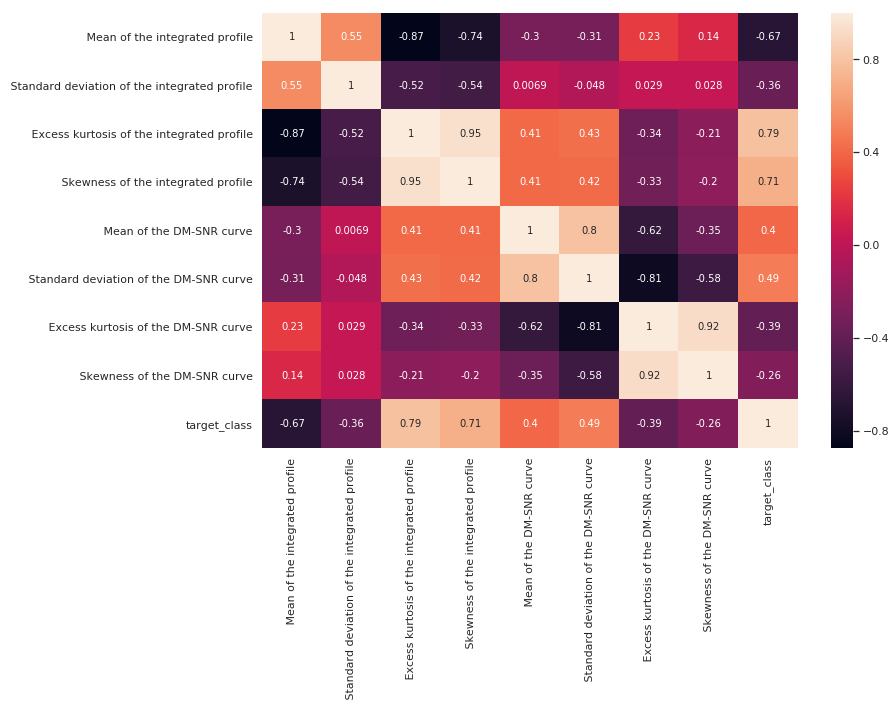

In [19]:
#data.corr()
plt.figure( figsize=(12,8))
sns.heatmap( data.corr(), annot=True )
plt.show()

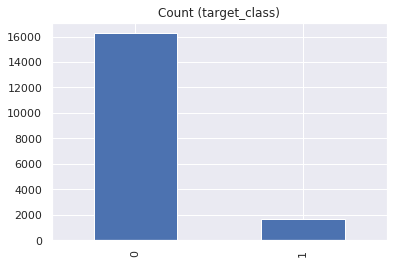

In [8]:
data['target_class'].value_counts().plot(kind = 'bar', title = 'Count (target_class)')
plt.show()

In [0]:
X = np.array(data.iloc[:, 0:-1])
Y = np.array(data.iloc[:, -1])

In [0]:
#from imblearn.over_sampling import RandomOverSampler

#X = X.copy()
#Y = Y.copy()

#ros = RandomOverSampler()
#X, Y = ros.fit_sample(X, Y)

#Y = Y.reshape(-1,1)

#print(X.shape)
#print(Y.shape)

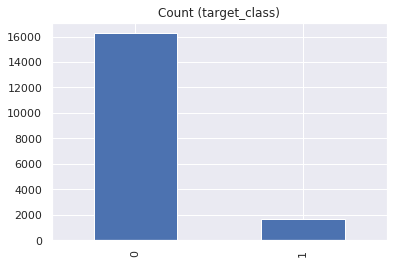

In [11]:
df_Y = pd.DataFrame(Y)
df_Y.columns = ['target_class']

df_Y.target_class.value_counts().plot(kind = 'bar', title = 'Count (target_class)')
plt.show()

Let's split our dataset into a training and testing set

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_split = StratifiedShuffleSplit(n_splits = 2, random_state = 0, test_size = 0.3)

for train_index, test_index in stratified_split.split(X, Y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

print(x_train.shape)
print(x_test.shape)
print(x_train.shape)
print(x_test.shape)

(12528, 8)
(5370, 8)
(12528, 8)
(5370, 8)


Let's normalize our features

In [0]:
from sklearn.preprocessing import StandardScaler

std_sclr = StandardScaler()
x_train  = std_sclr.fit_transform(x_train)
x_test   = std_sclr.fit_transform(x_test)

#Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report

lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)
lr_prediction = lr.predict(x_test)
mse_lr=mean_squared_error(y_test,lr_prediction)

cm_lr=confusion_matrix(y_test,lr_prediction)
cm_lr=pd.DataFrame(cm_lr)
cr_lr=classification_report(y_test,lr_prediction)

score_and_mse={"model":["logistic regression"],"Score":[lr.score(x_test,y_test)],"MSE":[mse_lr]}
score_and_mse=pd.DataFrame(score_and_mse)

print('Classification report for Logistic Regression: \n',cr_lr)

Classification report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4878
           1       0.93      0.83      0.88       492

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



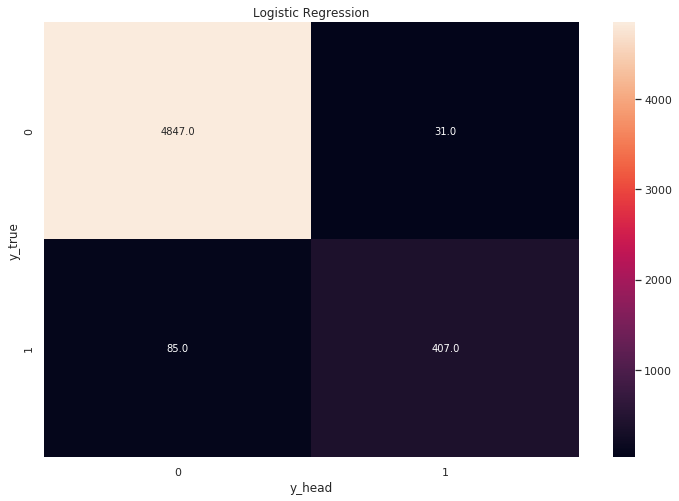

In [25]:
plt.figure( figsize=(12,8))
g1 = sns.heatmap(cm_lr,annot=True,fmt=".1f")
g1.set_ylabel('y_true')
g1.set_xlabel('y_head')
g1.set_title("Logistic Regression")
plt.show()

#Build model with Keras

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam',          # this update the weights of our model
              loss='binary_crossentropy',# this mesures how accurate our model during training
                  #'sparse_categorical_crossentropy',
              metrics=['mae', 'acc'])    # this used for monitoring the training and testing steps
model.summary()

In [0]:
#callbacks = [keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, restore_best_weights = True)]
history = model.fit(X_train, Y_train, epochs=100) #, callbacks=callbacks

In [0]:
preds = model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


acc      = accuracy_score  (Y_test.argmax(axis = 1), preds.argmax(axis = 1))
f1       = f1_score        (Y_test.argmax(axis = 1), preds.argmax(axis = 1))
prec     = precision_score (Y_test.argmax(axis = 1), preds.argmax(axis = 1))
recall   = recall_score    (Y_test.argmax(axis = 1), preds.argmax(axis = 1))
conf_mat = confusion_matrix(Y_test.argmax(axis = 1), preds.argmax(axis = 1))

In [0]:
print('Accuracy score: {}%'.format(acc * 100))
print('F-measure: {}%'.format(f1 * 100))
print('Precision score: {}%'.format(prec * 100))
print('Recall score: {}%'.format(recall * 100))
print('Confusion matrix: ')
print(conf_mat)

In [0]:
preds_df = pd.DataFrame(preds.argmax(axis = 1))
trues_df = pd.DataFrame(Y_test)

preds_df.to_csv(path+'preds.csv', index = False)
trues_df.to_csv(path+'trues.csv', index = False)